In [1]:
from github import Github
from github_token import TOKEN

client = Github(TOKEN)

REPO = 'godotengine/godot'
repo = client.get_repo(REPO)

In [2]:
from gh_graph_utils import augment_owns, augment_stargazers
import networkx as nx

graph = nx.DiGraph()
graph.add_node(repo.name, node_type='repo')

In [3]:
visited_users = set()
newusers = augment_stargazers(graph, repo)

In [6]:
#alternate running this with the next cell
newrepos = []
nx.write_gpickle(graph, 'repo-start.pkl')
for user in newusers:
    if not user in visited_users:
        newrepos.extend(augment_owns(graph, user, lang=True))
        visited_users.add(user)

RateLimitExceededException: 403 {"message": "API rate limit exceeded for user ID 22348599.", "documentation_url": "https://docs.github.com/rest/overview/resources-in-the-rest-api#rate-limiting"}

In [5]:
newusers = []
nx.write_gpickle(graph, 'repo-start.pkl')
for repo in newrepos:
    newusers.extend(augment_stargazers(graph, repo))

In [7]:
# final write, for prosperity
nx.write_gpickle(graph, 'repo-start.pkl')

In [11]:
len(graph.nodes)

21644

# List
- Starting Point - Repo 'godotengine/godot'
- Based on your visualization, what are the top 4 languages by user popularity?  How many users use the most popular language? (you may need to consult your numbers for that): JavaScript, Python, C, C++. 151 in JavaScript.
- Based on your visualization, what are the top 4 languages by repo usage? How many repos are written in the most used language?:
- Nodes in total graph: 21644
- "levels" away from your starting point (before rate limited): 3 (stargazers, owns, stargazers)

# Cells below show user to language graph

In [20]:
lang_nodes = list(filter(lambda x: x and graph.nodes[x]['node_type'] == 'lang', graph.nodes()))
graph.in_degree(lang_nodes)

InDegreeView({'CSS': 321, 'C': 603, 'Common Lisp': 26, 'C++': 716, 'Java': 519, 'Dart': 23, 'Shell': 385, 'Go': 442, 'Lua': 122, 'Rust': 297, 'Python': 1313, 'CMake': 32, 'Starlark': 2, 'Emacs Lisp': 55, 'JavaScript': 2844, 'HTML': 406, 'C#': 237, 'PHP': 276, 'Ruby': 837, 'ActionScript': 48, 'Jupyter Notebook': 84, 'Haskell': 177, 'Objective-C': 276, 'CoffeeScript': 165, 'Haxe': 38, 'Scala': 99, 'TSQL': 2, 'Nix': 13, 'Groovy': 16, 'VimL': 76, 'GAP': 2, 'TeX': 63, 'TypeScript': 227, 'Scheme': 46, 'Clojure': 84, 'Swift': 97, 'Standard ML': 2, 'OCaml': 33, 'Kotlin': 38, 'Makefile': 58, 'Assembly': 38, 'CartoCSS': 5, 'Vim script': 45, 'Objective-C++': 14, 'Arduino': 22, 'D': 15, 'Modelica': 2, 'PureScript': 30, 'Racket': 9, 'Coq': 4, 'Dockerfile': 34, 'XML': 6, 'Tcl': 7, 'PowerShell': 12, 'XSLT': 5, 'Perl': 38, 'Elixir': 38, 'Erlang': 26, 'Ada': 2, 'HaXe': 2, 'Pascal': 20, 'Delphi': 2, 'wisp': 2, 'Processing': 9, 'Gosu': 2, 'Opa': 11, 'Batchfile': 6, 'Vue': 12, 'Matlab': 17, "Ren'Py": 2, '

In [23]:
from collections import Counter

languages = Counter(dict(graph.in_degree(lang_nodes)))
print(languages)

Counter({'JavaScript': 2844, 'Python': 1313, 'Ruby': 837, 'C++': 716, 'C': 603, 'Java': 519, 'Go': 442, 'HTML': 406, 'Shell': 385, 'CSS': 321, 'Rust': 297, 'PHP': 276, 'Objective-C': 276, 'C#': 237, 'TypeScript': 227, 'Haskell': 177, 'CoffeeScript': 165, 'Lua': 122, 'Scala': 99, 'Swift': 97, 'Jupyter Notebook': 84, 'Clojure': 84, 'VimL': 76, 'TeX': 63, 'Makefile': 58, 'Emacs Lisp': 55, 'ActionScript': 48, 'Scheme': 46, 'Vim script': 45, 'Haxe': 38, 'Kotlin': 38, 'Assembly': 38, 'Perl': 38, 'Elixir': 38, 'Dockerfile': 34, 'OCaml': 33, 'CMake': 32, 'PureScript': 30, 'Common Lisp': 26, 'Erlang': 26, 'Dart': 23, 'Arduino': 22, 'Pascal': 20, 'R': 18, 'GDScript': 18, 'Matlab': 17, 'Elm': 17, 'Groovy': 16, 'D': 15, 'Objective-C++': 14, 'Nix': 13, 'PowerShell': 12, 'Vue': 12, 'Puppet': 12, 'Opa': 11, 'GLSL': 10, 'Racket': 9, 'Processing': 9, 'Verilog': 9, 'F#': 8, 'Tcl': 7, 'XML': 6, 'Batchfile': 6, 'VHDL': 6, 'CartoCSS': 5, 'XSLT': 5, 'Nimrod': 5, 'Nim': 5, 'Coq': 4, 'AutoHotkey': 4, 'Eagle':

In [25]:
# Languages with most users and repos pointing at them
languages.most_common(20)

[('JavaScript', 2844),
 ('Python', 1313),
 ('Ruby', 837),
 ('C++', 716),
 ('C', 603),
 ('Java', 519),
 ('Go', 442),
 ('HTML', 406),
 ('Shell', 385),
 ('CSS', 321),
 ('Rust', 297),
 ('PHP', 276),
 ('Objective-C', 276),
 ('C#', 237),
 ('TypeScript', 227),
 ('Haskell', 177),
 ('CoffeeScript', 165),
 ('Lua', 122),
 ('Scala', 99),
 ('Swift', 97)]

#### This is user to lang  graph start

In [27]:
user_nodes = [node for node in graph.nodes() if graph.nodes[node]['node_type'] == 'user']

In [28]:
user_interest_nodes = user_nodes + lang_nodes
user_lang_graph = graph.subgraph(user_interest_nodes)

In [32]:
user_to_lang = Counter(dict(user_lang_graph.in_degree(lang_nodes)))

In [33]:
user_to_lang.most_common(20)

[('JavaScript', 151),
 ('Python', 130),
 ('C', 117),
 ('C++', 113),
 ('Shell', 103),
 ('HTML', 99),
 ('CSS', 89),
 ('Ruby', 88),
 ('Java', 81),
 ('Go', 69),
 ('PHP', 60),
 ('C#', 53),
 ('TypeScript', 50),
 ('CoffeeScript', 43),
 ('Rust', 42),
 ('Objective-C', 38),
 ('Lua', 36),
 ('VimL', 28),
 ('Jupyter Notebook', 27),
 ('Haskell', 26)]

In [36]:
most_common_lang = []
for lang, _ in user_to_lang.most_common(20):
    most_common_lang.append(lang)
print(most_common_lang)

['JavaScript', 'Python', 'C', 'C++', 'Shell', 'HTML', 'CSS', 'Ruby', 'Java', 'Go', 'PHP', 'C#', 'TypeScript', 'CoffeeScript', 'Rust', 'Objective-C', 'Lua', 'VimL', 'Jupyter Notebook', 'Haskell']


In [37]:
reduced_user_lang_graph = user_lang_graph.subgraph(most_common_lang + user_nodes)

In [41]:
node_degrees = reduced_user_lang_graph.degree()
cool_user_nodes = [x for x in reduced_user_lang_graph.nodes() if node_degrees[x] > 0]

In [42]:
final_user_to_lang_graph = reduced_user_lang_graph.subgraph(cool_user_nodes)

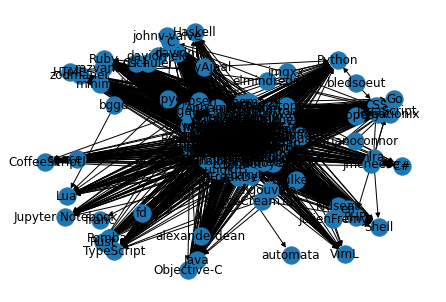

In [43]:
import matplotlib.pyplot as plt

nx.draw(final_user_to_lang_graph, with_labels=True)

In [44]:
def graph_colors(graph):
    colormap = {'user': 'green', 'lang':'violet', 'repo': 'blue'}
    colorlist = []
    for node in graph.nodes():
        nodetype = graph.nodes[node]['node_type']
        colorlist.append(colormap.get(nodetype, 'black'))
    return colorlist

In [47]:
colors = graph_colors(final_user_to_lang_graph)

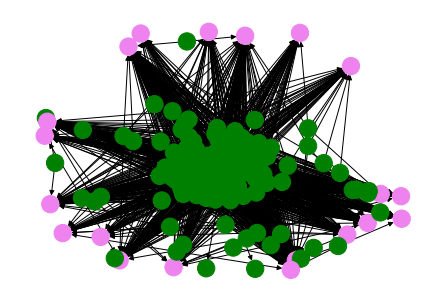

In [48]:
nx.draw(final_user_to_lang_graph, node_color=colors)

In [56]:
user_lang_labels = {n:n for n in most_common_lang}

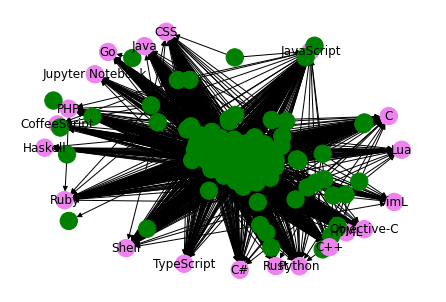

In [57]:
nx.draw(final_user_to_lang_graph, node_color=colors, labels=user_lang_labels)

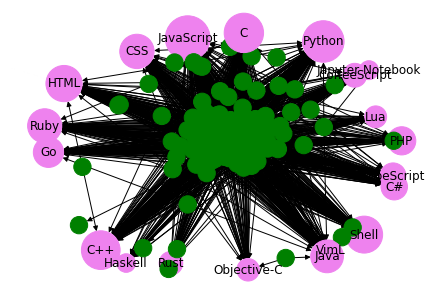

In [61]:
BASE=300

node_sizes=[]
for node in final_user_to_lang_graph.nodes():
    if node in user_lang_labels:
        node_sizes.append(user_to_lang[node]*2000/151)
    else:
        node_sizes.append(BASE)
        
nx.draw(final_user_to_lang_graph, node_color=colors, labels=user_lang_labels, node_size=node_sizes)
plt.savefig("user_to_lang_graph")

# Cells below show repo to language graph